In [110]:
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [79]:
# lets load the dataset

tips = data('tips')

In [80]:
#lets take a quick look at the dataset

tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
# lets get some information on the data

tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


**Takeaways:**
    - We might have to do some encoding to conver the data into numeric data type
    - There are no any na value.
    - Basically, the data is prepared for us
    - we can move on to data split
    

**Looking at the dataset, things I might want to know are:**
- Is there a pattern in tip giving?
- IS there a relationship between the time and tip?
- Is there a relationship between gender and tip?
- Is there a relationship between being a smoker and tip?
- Is there a relationship between the day and tip?
- Can certain time of the day mean more tip?
- Or does bigger party always mean more tip?

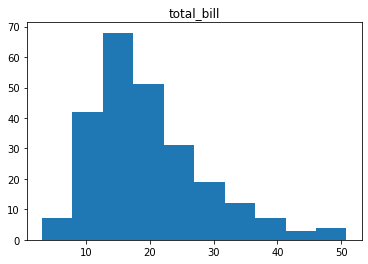

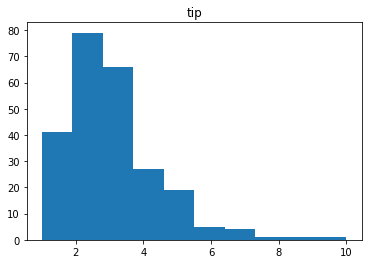

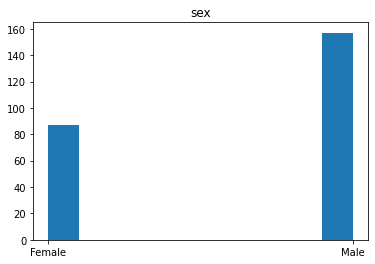

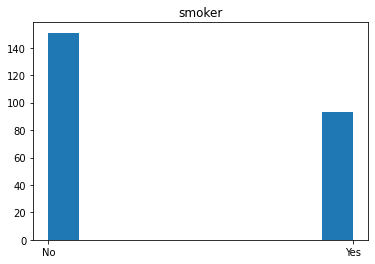

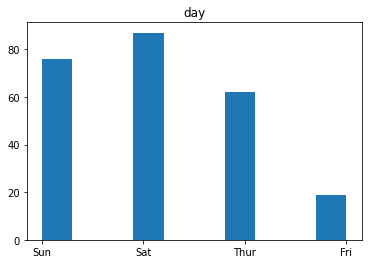

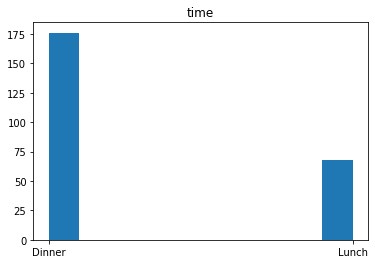

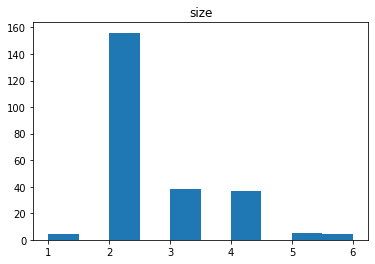

In [85]:
for col in tips.columns:
    plt.hist(tips[col])
    plt.title(col)
    plt.show()

**Takeaways so far:**
- total bill is right skewed
- tip is right skewed
- more people come to the restaurant on Saturday, then sunday, then thursday, and then friday
- more people come for dinner
- majortiy of the patorns are non smoker
- majority of the patrons are male
- people come in size of 2 most frequently


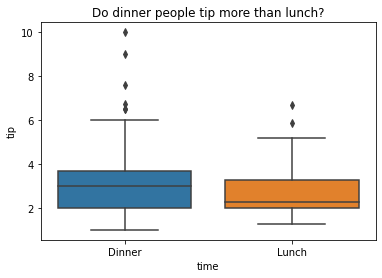

In [91]:
# Does the time of the day influence tip?

sns.boxplot(tips.time, tips.tip)
plt.title('Do dinner people tip more than lunch?')
plt.show()

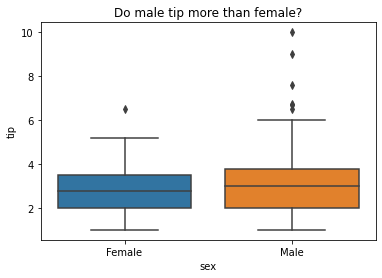

In [92]:
# Do male tip more than female?

sns.boxplot(tips.sex, tips.tip)
plt.title('Do male tip more than female?')
plt.show()

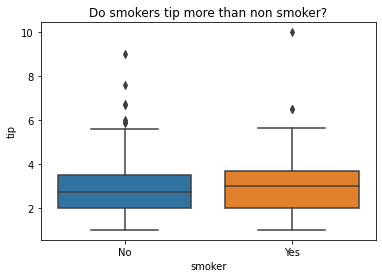

In [93]:
# Do smokers tip more than non smoker?

sns.boxplot(tips.smoker, tips.tip)
plt.title('Do smokers tip more than non smoker?')
plt.show()

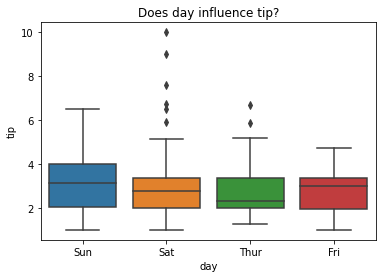

In [94]:
# Does day inluence tip?

sns.boxplot(tips.day, tips.tip)
plt.title('Does day influence tip?')
plt.show()

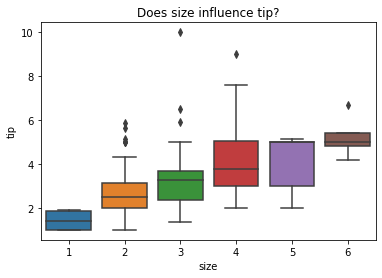

In [99]:
# does size influence tip
sns.boxplot(tips['size'], tips.tip)
plt.title('Does size influence tip?')
plt.show()

**Takeaways so far:**
- The bigger the size of the party, the higher the tip
- Patrons coming on sunday tip more than other days
- Smokers tip more than non smokers
- Male tip more than female
- Dinner customers tip more than lunch customers

**Is there a relationhsip between total bill and tip?**

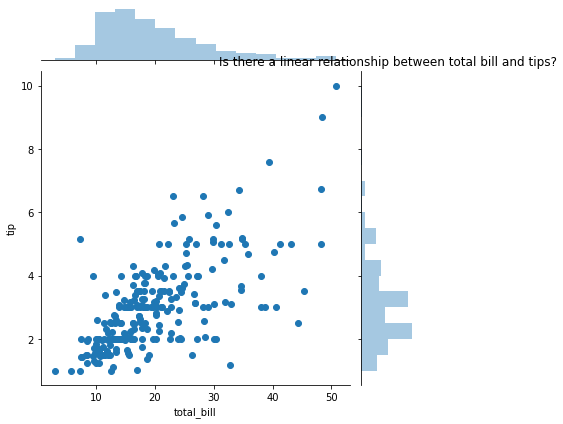

In [109]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
plt.title('Is there a linear relationship between total bill and tips?')
plt.show()

In [115]:
# lets do a spearman r test to check the relationship. We do spearmans test because these variables are not
# normally distributed
x1 = tips.total_bill
x2 = tips.tip
corr, p = stats.spearmanr(x1,x2)

corr, p

(0.6789681219001009, 2.501158440923619e-34)

**Since the p value is low, we can reject the null and assume that there is a linear relationship between total bill and tip**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

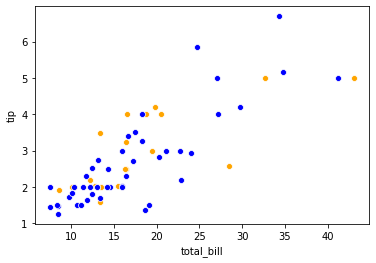

In [147]:
sns.scatterplot(y = 'tip', x = 'total_bill', data = tips[(tips.smoker == 'Yes')& (tips.sex == 'Male')&
                                                         (tips.time =='Lunch')],color = 'orange')

sns.scatterplot(y = 'tip', x = 'total_bill', data = tips[(tips.smoker == 'Yes') & (tips.sex == 'Female')&(tips.time =='Lunch')],
                color = 'orange')

sns.scatterplot(y = 'tip', x = 'total_bill', data = tips[(tips.smoker == 'No')& (tips.sex == 'Male')&(tips.time =='Lunch')],
                color = 'blue')

sns.scatterplot(y = 'tip', x = 'total_bill', data = tips[(tips.smoker == 'No') & (tips.sex == 'Female')&(tips.time =='Lunch')],
                color = 'blue')

In [72]:
# we will come back to this later

tips = pd.concat([tips, pd.get_dummies(tips.sex, drop_first = True),
pd.get_dummies(tips.smoker, drop_first = True),
pd.get_dummies(tips.time), pd.get_dummies(tips.day)], axis = 1)

In [73]:
tips.rename(columns = ({'Yes': 'is_smoker'}), inplace = True)

In [74]:
tips.drop(columns = ['sex', 'smoker', 'time', 'day'], inplace = True)

In [75]:
tips

,total_bill,tip,size,Male,is_smoker,Dinner,Lunch,Fri,Sat,Sun,Thur
1,16.99,1.01,2,0,0,1,0,0,0,1,0
2,10.34,1.66,3,1,0,1,0,0,0,1,0
3,21.01,3.50,3,1,0,1,0,0,0,1,0
4,23.68,3.31,2,1,0,1,0,0,0,1,0
5,24.59,3.61,4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,3,1,0,1,0,0,1,0,0
241,27.18,2.00,2,0,1,1,0,0,1,0,0
242,22.67,2.00,2,1,1,1,0,0,1,0,0
243,17.82,1.75,2,1,0,1,0,0,1,0,0


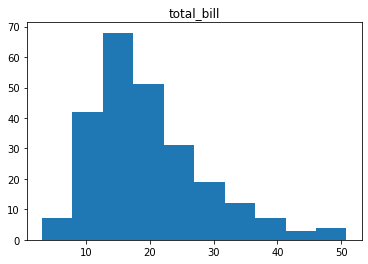

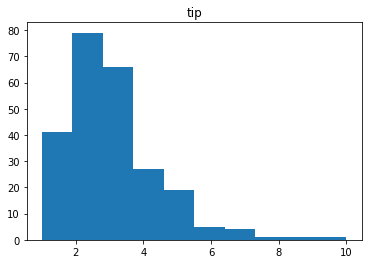

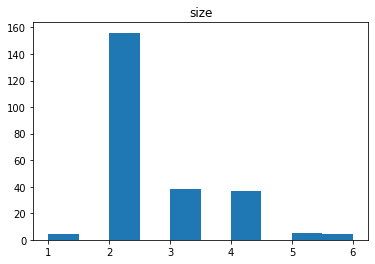

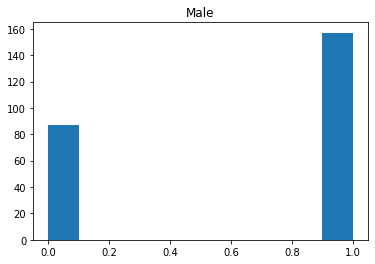

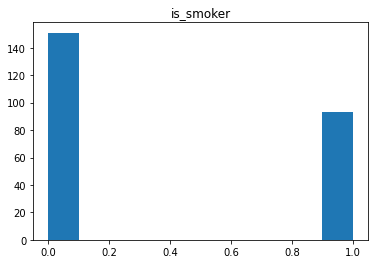

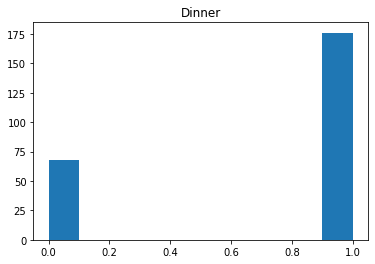

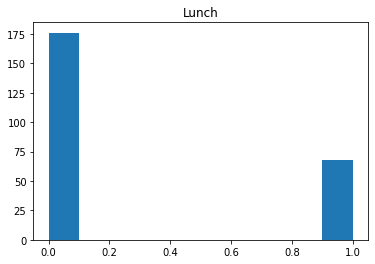

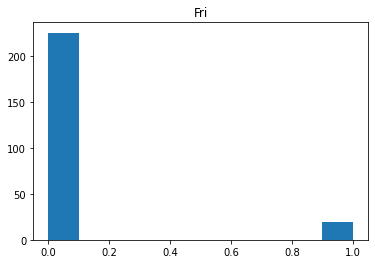

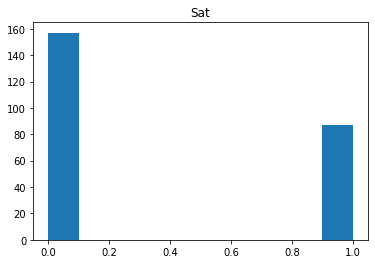

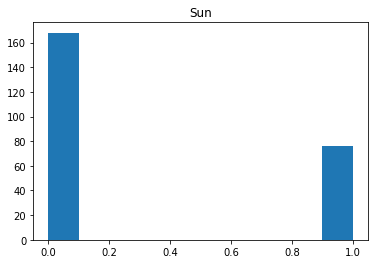

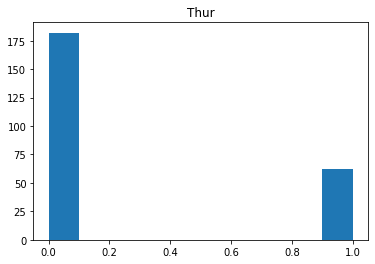

In [76]:
for col in tips.columns:
    plt.hist(tips[col])
   
    plt.title(col)
    plt.show()

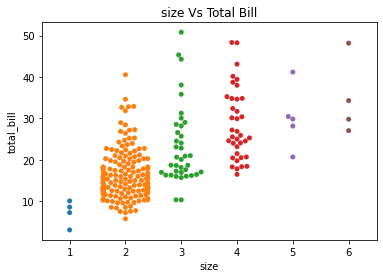

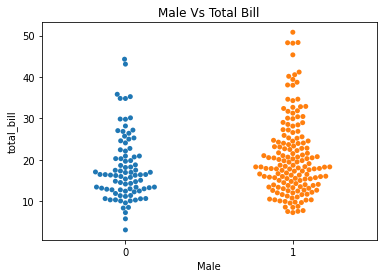

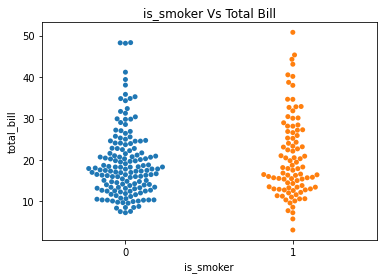

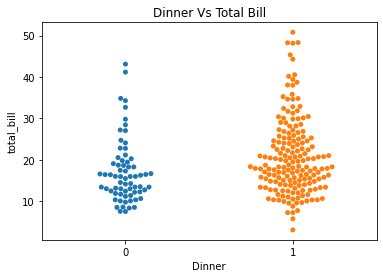

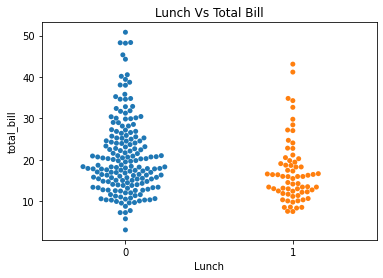

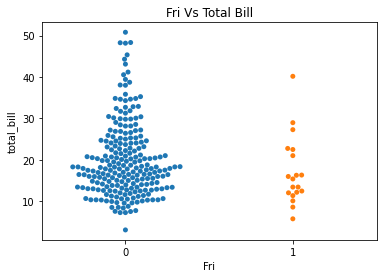

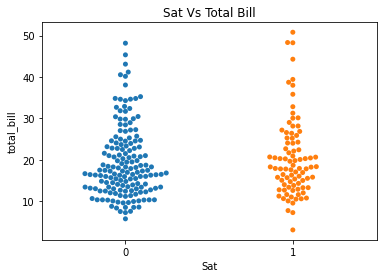

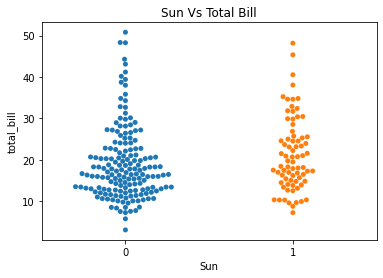

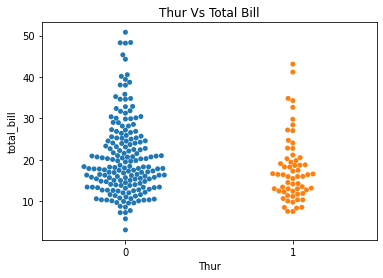

In [77]:
for col in ['size','Male','is_smoker','Dinner','Lunch','Fri','Sat','Sun', 'Thur']:
    sns.swarmplot(tips[col], tips.total_bill)
    plt.title(col + ' Vs Total Bill')
    plt.show()
   


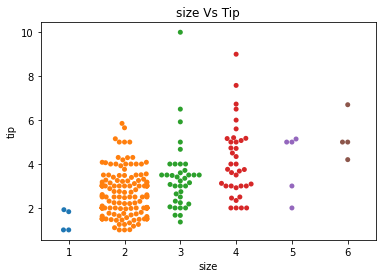

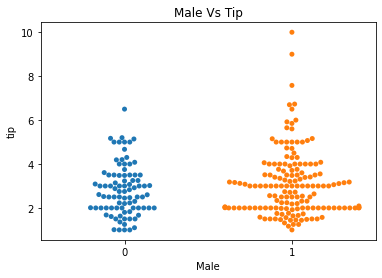

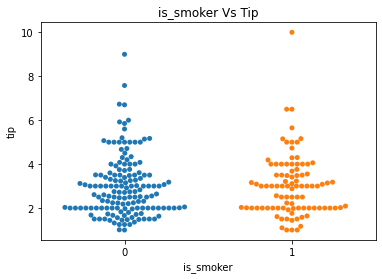

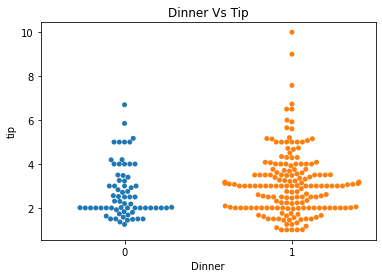

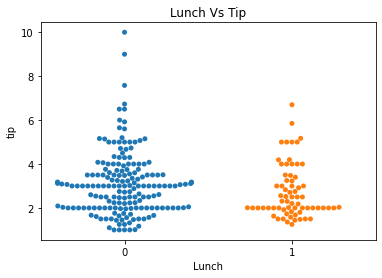

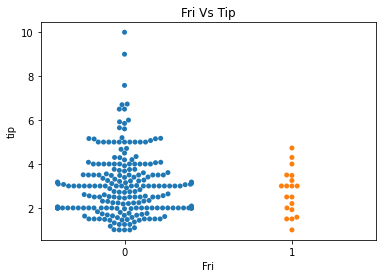

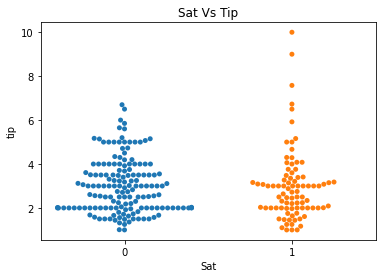

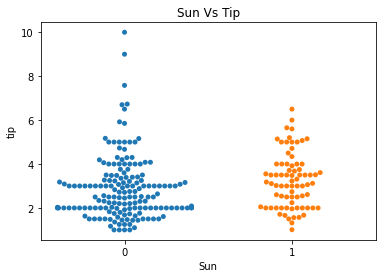

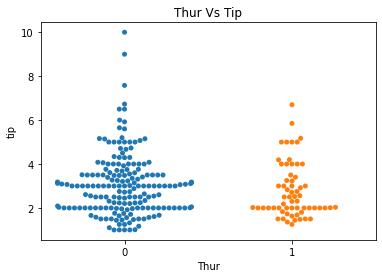

In [78]:
for col in ['size','Male','is_smoker','Dinner','Lunch','Fri','Sat','Sun', 'Thur']:
    sns.swarmplot(tips[col], tips.tip)
    plt.title(col + ' Vs Tip')
    plt.show()
   